In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
%matplotlib inline
import math

In [2]:
claims = pd.read_csv("C:/Users/Bishwarup/Desktop/Analytix Labs/Analytix Labs(Case Study & Assignments)/3.Insurance_Claims/claims.csv")
cust_demo = pd.read_csv("C:/Users/Bishwarup/Desktop/Analytix Labs/Analytix Labs(Case Study & Assignments)/3.Insurance_Claims/cust_demographics.csv")

In [3]:
#Data Inspection
claims.info()
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 

In [4]:
claims


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [5]:
cust_demo

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


## Joining the tables
### Q1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [29]:
cust_final = pd.merge(left= claims,right = cust_demo,how= 'inner', left_on = 'customer_id' , right_on= 'CUST_ID' )
cust_final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver


### Q2.Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [30]:
cust_final.dtypes
#Yes there is a mismatch within the current datatypes of the columns and their business significance
#claim_date is object type. It should be of datetime.
#claim_amount should be float/integer but is of object type

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

### Q3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [31]:
cust_final.claim_amount = cust_final.claim_amount.str.replace('$', '')
cust_final.claim_amount = pd.to_numeric(cust_final.claim_amount)

cust_final.claim_amount

#cust_final.claim_amount.astype('float64')

0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
         ...   
1080     1770.0
1081     2800.0
1082    33080.0
1083     2840.0
1084     1490.0
Name: claim_amount, Length: 1085, dtype: float64

### Q4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.


In [32]:
a = cust_final[cust_final.claim_type =='Injury only']

In [33]:
cust_final['Alert Flag'] = cust_final[cust_final.claim_type =='Injury only'].police_report.map({'No':0, 'Unknown':1})
a

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
8,24050443,21831191,Other driver error,10/04/2017,Auto,No,Injury only,38306.5,3.0,Yes,21831191,Male,17-May-77,NH,419-712-8513,Gold
18,67257404,18288638,Other driver error,04/24/2018,Auto,Yes,Injury only,32560.0,1.0,No,18288638,Female,14-Jan-69,MI,314-135-1359,Platinum
21,7809917,63916778,Other causes,07/22/2017,Auto,No,Injury only,17800.0,1.0,No,63916778,Male,07-Sep-66,IL,146-157-4572,Platinum
22,29205389,17004138,Natural causes,06/25/2017,Auto,No,Injury only,31380.0,1.0,No,17004138,Female,13-Aug-65,WA,436-354-4682,Silver
23,19051665,9667764,Other causes,12/17/2017,Auto,Yes,Injury only,36190.0,1.0,No,9667764,Female,10-Oct-79,SC,643-978-8251,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,85546357,90217818,Other driver error,06/04/2017,Auto,No,Injury only,37743.0,1.0,Yes,90217818,Female,18-May-80,TN,891-651-8671,Gold
1064,56358443,75934330,Natural causes,01/01/2017,Auto,Yes,Injury only,20630.0,1.0,No,75934330,Female,09-Oct-87,ME,951-941-3975,Platinum
1072,50800999,51669975,Other causes,09/19/2018,Home,Yes,Injury only,38950.0,1.0,No,51669975,Female,05-Feb-88,ND,975-463-9541,Silver
1074,36599575,87596868,Driver error,10/09/2018,Auto,Unknown,Injury only,33330.0,2.0,No,87596868,Male,18-Nov-61,AZ,573-396-3182,Silver


### Q5.One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique.

In [34]:
cust_final.customer_id[cust_final.customer_id.duplicated()].count()

#7 customer_id were duplicated.

cust_final.customer_id.drop_duplicates(inplace = True)
cust_final

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert Flag
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,NaN
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,NaN
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,NaN
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,NaN
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,NaN
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,NaN
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,NaN
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,NaN


### Q6.Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [35]:
cust_final.info()
#There are certain missing values as seen from the info.
#Also some data types are wrong for example claim_date. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   float64
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [36]:
cust_final.claim_date = pd.to_datetime(cust_final.claim_date)

In [37]:
cust_final.DateOfBirth = pd.to_datetime(cust_final.DateOfBirth)

In [38]:
#Missing Value Imputation. Separating numeric and object type data types.

# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [39]:
cust_numeric= cust_final.select_dtypes(['float64','int64'])
cust_object = cust_final.select_dtypes(['object','datetime64[ns]'])

In [40]:
cust_numeric = cust_numeric.apply(missing_imputation)
cust_object = cust_object.apply(missing_imputation)

#cust_cat.gender =  cust_cat.gender.fillna(cust_cat.gender.mode())

In [41]:
cust_final1 = pd.concat([cust_numeric,cust_object], axis = 1)

In [42]:
cust_final1

,claim_id,customer_id,claim_amount,total_policy_claims,CUST_ID,Alert Flag,incident_cause,claim_date,claim_area,police_report,claim_type,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,2980.0,1.0,21868593,0.52,Driver error,2017-11-27,Auto,No,Material only,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,2980.0,3.0,75740424,0.52,Crime,2018-10-03,Home,Unknown,Material only,No,Female,2070-01-13,ME,265-543-1264,Silver
2,53522022,30308357,3369.5,1.0,30308357,0.52,Other driver error,2018-02-02,Auto,No,Material only,Yes,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,1950.0,6.0,30308357,0.52,Driver error,2018-04-04,Auto,No,Material only,No,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,1680.0,1.0,47830476,0.52,Natural causes,2018-06-17,Auto,No,Material only,No,Female,1986-05-01,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,1770.0,1.0,79539873,0.52,Other driver error,2018-09-06,Auto,Yes,Material only,No,Female,1981-03-15,ND,459-425-4319,Platinum
1081,63269067,42364152,2800.0,1.0,42364152,0.52,Other causes,2017-05-09,Home,No,Material only,No,Female,1996-07-07,ID,529-462-1635,Silver
1082,22690595,19888166,33080.0,2.0,19888166,0.52,Other driver error,2017-05-15,Auto,Yes,Injury only,No,Male,1990-04-11,WI,712-651-9613,Gold
1083,12376894,11256802,2840.0,4.0,11256802,0.52,Other driver error,2017-04-18,Auto,No,Material only,No,Female,2064-10-22,LA,469-345-5617,Silver


### Q7.Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior >60

In [43]:
#cust_final1['Age'] = pd.datetime.now().year - cust_final1.DateOfBirth

In [44]:
a = pd.to_datetime(cust_final1.DateOfBirth)
cust_final1['Year'] = a.dt.year

In [45]:
cust_final1.drop(columns = 'Age', inplace = True)

KeyError: "['Age'] not found in axis"

In [46]:
cust_final1['Age'] =  pd.datetime.now().year- a.dt.year

<ipython-input-46-37ff94f5a50b>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  cust_final1['Age'] =  pd.datetime.now().year- a.dt.year


In [47]:
cust_final1['Age_group'] = pd.cut(cust_final1.Age, bins = [-50,0, 18, 30, 60,100], labels = ['Wrong Information','Children','Youth','Adult','Senior'] )

#We have one negative age which is wrong information so instead of null gave it the name Wrong Information.

In [48]:
cust_final1.head(10)

,claim_id,customer_id,claim_amount,total_policy_claims,CUST_ID,Alert Flag,incident_cause,claim_date,claim_area,police_report,claim_type,fraudulent,gender,DateOfBirth,State,Contact,Segment,Year,Age,Age_group
0,54004764,21868593,2980.0,1.0,21868593,0.52,Driver error,2017-11-27,Auto,No,Material only,No,Female,1979-01-12,VT,789-916-8172,Platinum,1979,42,Adult
1,33985796,75740424,2980.0,3.0,75740424,0.52,Crime,2018-10-03,Home,Unknown,Material only,No,Female,2070-01-13,ME,265-543-1264,Silver,2070,-49,Wrong Information
2,53522022,30308357,3369.5,1.0,30308357,0.52,Other driver error,2018-02-02,Auto,No,Material only,Yes,Female,1984-03-11,TN,798-631-4758,Silver,1984,37,Adult
3,63017412,30308357,1950.0,6.0,30308357,0.52,Driver error,2018-04-04,Auto,No,Material only,No,Female,1984-03-11,TN,798-631-4758,Silver,1984,37,Adult
4,13015401,47830476,1680.0,1.0,47830476,0.52,Natural causes,2018-06-17,Auto,No,Material only,No,Female,1986-05-01,MA,413-187-7945,Silver,1986,35,Adult
5,91609100,47830476,1440.0,1.0,47830476,0.52,Natural causes,2017-04-12,Auto,Unknown,Material only,No,Female,1986-05-01,MA,413-187-7945,Silver,1986,35,Adult
6,22890252,19269962,2680.0,1.0,19269962,0.52,Crime,2018-01-13,Auto,No,Material only,No,Male,1977-05-13,NV,956-871-8691,Gold,1977,44,Adult
7,39219616,19269962,2240.0,2.0,19269962,0.52,Other causes,2018-09-26,Auto,No,Material only,No,Male,1977-05-13,NV,956-871-8691,Gold,1977,44,Adult
8,24050443,21831191,38306.5,3.0,21831191,0.00,Other driver error,2017-10-04,Auto,No,Injury only,Yes,Male,1977-05-17,NH,419-712-8513,Gold,1977,44,Adult
9,91475471,21831191,36810.0,1.0,21831191,0.52,Driver error,2018-02-09,Auto,Unknown,Material and injury,No,Male,1977-05-17,NH,419-712-8513,Gold,1977,44,Adult


### Q8.What is the average amount claimed by the customers from various segments?

In [49]:
cust_final1.pivot_table(values = 'claim_amount', index= 'claim_type', columns = 'incident_cause',aggfunc = np.mean).T

claim_type,Injury only,Material and injury,Material only
incident_cause,,,
Crime,27846.227273,31549.642857,2578.693410
Driver error,24062.409915,28868.601233,2938.503487
Natural causes,26274.834198,26430.627684,2597.685480
Other causes,25963.122627,27746.675968,2950.077614
Other driver error,27414.065936,28075.690875,2607.397439


### Q9.What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [51]:
a = cust_final1.claim_date[cust_final1.claim_date > '2018-10-01']
b = a +  pd.DateOffset(days = 20)

cust_final1.claim_date[cust_final1.claim_date > '2018-10-01' ] 
cust_final1.pivot_table(index = b, values = 'claim_amount', aggfunc = np.sum)

,claim_amount
claim_date,
2018-10-23,187834.681373
2018-10-29,225007.500000
2018-11-05,119829.000000
2018-11-12,147078.362745
2018-11-19,120729.862745


### Q10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [52]:
cust_final1[(cust_final1.Age_group == 'Adult') 
            & cust_final1.State.isin(['TX','DE','AK']) 
            & (cust_final1.incident_cause.isin(['Driver error','Other driver error']))]

,claim_id,customer_id,claim_amount,total_policy_claims,CUST_ID,Alert Flag,incident_cause,claim_date,claim_area,police_report,claim_type,fraudulent,gender,DateOfBirth,State,Contact,Segment,Year,Age,Age_group
101,4506676,2632562,1400.000000,1.0,2632562,0.52,Other driver error,2018-05-14,Home,Unknown,Material only,No,Female,1985-12-14,AK,498-597-9658,Platinum,1985,36,Adult
103,82144259,92752865,12467.681373,1.0,92752865,0.00,Driver error,2017-04-25,Auto,No,Injury only,No,Male,1986-01-30,AK,143-219-5498,Silver,1986,35,Adult
147,26716331,3159546,17590.000000,4.0,3159546,0.00,Other driver error,2017-04-25,Auto,No,Injury only,No,Male,1987-10-20,TX,586-129-9752,Platinum,1987,34,Adult
187,21550521,68772500,2320.000000,1.0,68772500,0.52,Driver error,2018-08-30,Auto,Unknown,Material only,No,Male,1989-11-10,TX,562-259-5432,Silver,1989,32,Adult
188,69348631,154557,12467.681373,1.0,154557,0.00,Driver error,2018-04-10,Auto,No,Injury only,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,1978,43,Adult
199,46572741,82415154,15240.000000,1.0,82415154,0.52,Other driver error,2017-06-11,Auto,No,Material and injury,No,Female,1980-03-08,DE,578-942-1542,Platinum,1980,41,Adult
246,7238381,684748,2920.000000,2.0,684748,0.52,Other driver error,2018-07-14,Auto,No,Material only,No,Male,1977-08-03,AK,613-385-2863,Gold,1977,44,Adult
275,34621474,54094880,1529.500000,1.0,54094880,0.52,Other driver error,2017-02-17,Auto,No,Material only,Yes,Male,1984-06-01,DE,568-481-7418,Silver,1984,37,Adult
277,93028492,62204138,2691.000000,1.0,62204138,0.52,Driver error,2017-10-31,Auto,Unknown,Material only,Yes,Female,1989-12-15,DE,471-934-4961,Platinum,1989,32,Adult
322,87329176,77510822,12467.681373,2.0,77510822,0.52,Other driver error,2018-10-30,Auto,Unknown,Material only,No,Female,1986-03-18,AK,436-934-7156,Silver,1986,35,Adult


### Q11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

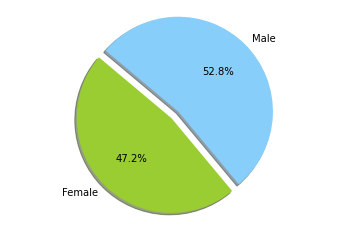

In [53]:
a = cust_final1.pivot_table(values = 'claim_amount', index = 'gender', aggfunc = np.sum )

a.round(3).loc['Female','claim_amount'] # 6381133.76 for Females
a.round(3).loc['Male','claim_amount'] # 7146300.53 for Males

labels = 'Female', 'Male'
sizes = [a.round(2).loc['Female','claim_amount'] ,a.round(3).loc['Male','claim_amount']]
colors = [ 'yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


### Q12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

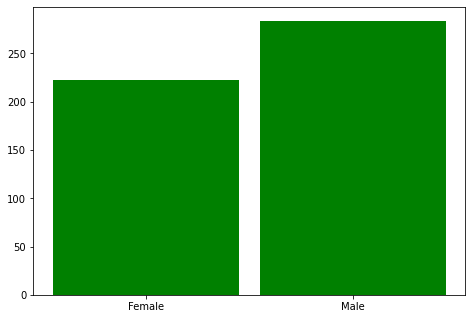

In [54]:
a = cust_final1[cust_final1.incident_cause.isin(['Driver error',  'Other driver error'])].gender == 'Female'

b = cust_final1[cust_final1.incident_cause.isin(['Driver error',  'Other driver error'])].gender == 'Male'

a[a].count() #222 Count Female

b[b].count() #284 Count Male
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Female','Male']
count = [a[a].count(),b[b].count() ]
ax.bar(gender, count, color = 'g', width = 0.9)
plt.show()

In [55]:
cust_final1.Age_group.unique()

['Adult', 'Wrong Information', 'Youth']
Categories (3, object): ['Wrong Information' < 'Youth' < 'Adult']

### Q13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

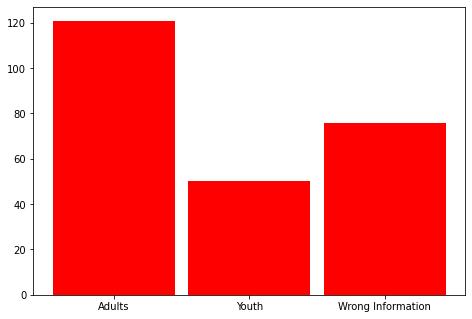

In [56]:
a = cust_final1[cust_final1.fraudulent == 'Yes'].Age_group == 'Adult'
b = cust_final1[cust_final1.fraudulent == 'Yes'].Age_group == 'Youth'
c = cust_final1[cust_final1.fraudulent == 'Yes'].Age_group == 'Wrong Information'

a[a].count() #119 for Adults
b[b].count() #59 for Youth
c[c].count() #69 for Wrong Information

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age = ['Adults','Youth','Wrong Information']
count = [a[a].count(),b[b].count(), c[c].count()]
ax.bar(age, count, width = 0.9, color = 'r')
plt.show()

### Q14.Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.


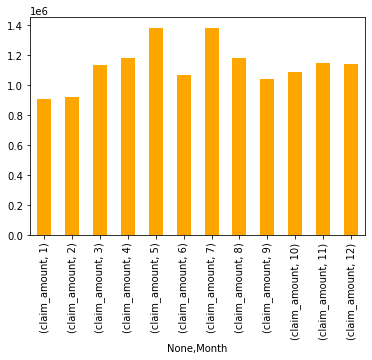

In [57]:
a = pd.to_datetime(cust_final1.DateOfBirth)
cust_final1['Month'] = a.dt.month

b = cust_final1.pivot_table(index= 'Month', values = 'claim_amount', aggfunc = np.sum).round(2)

b.unstack('Month').plot(kind='bar', color = 'orange')
plt.show()

### Q15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims


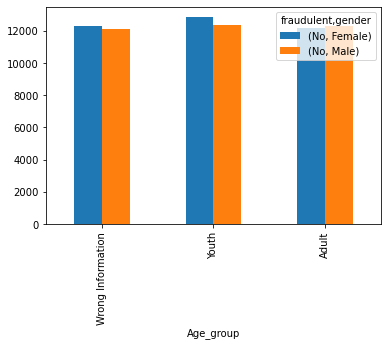

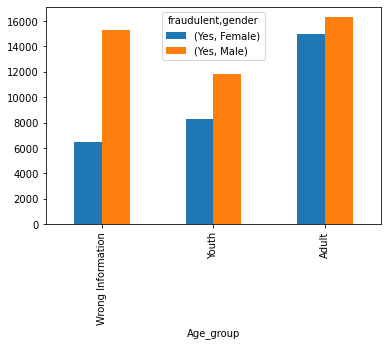

In [58]:
a = cust_final1[cust_final1.fraudulent == 'No'] #No Fraud
b = cust_final1[cust_final1.fraudulent =='Yes'] #Fraud

c = a.pivot_table(values = 'claim_amount', index = 'Age_group',columns = ['fraudulent','gender'], aggfunc = np.mean )
d = b.pivot_table(values = 'claim_amount', index = 'Age_group', columns = ['fraudulent','gender'], aggfunc = np.mean )

c.plot(kind='bar')

plt.show()

d.plot(kind = 'bar')

plt.show()

In [59]:
#16. Is there any similarity in the amount claimed by males and females?

a = cust_final1[cust_final1.gender == 'Female']
b = cust_final1[cust_final1.gender == 'Male']

#a.claim_amount
#b.claim_amount.iloc[1:530] has been used to equal the records for males and females for pearson test.
#The amount claimed is slightly corelated.
stats.pearsonr(a.claim_amount, b.claim_amount.iloc[1:530])
stats.f_oneway(a.claim_amount, b.claim_amount.iloc[1:530])
stats.ttest_rel(a.claim_amount, b.claim_amount.iloc[1:530])
#The means of the insurance amount are similiar which can be said with 95% confidence.
#Also, the variances of the two groups are similar as the null hypothesis is not rejected which can be said with 95% confidence.

Ttest_relResult(statistic=-1.1231369855206668, pvalue=0.2618897395613942)

In [60]:
#17. Is there any relationship between age category and segment?

a = pd.crosstab(index = cust_final1.claim_type, columns = cust_final1.Age_group)
#Chi square test for categorical variables

stats.chi2_contingency(observed = a)

(8.466097741764594,
 0.07592154271953538,
 4,
 array([[ 54.99539171,  45.64976959,  94.35483871],
        [ 66.840553  ,  55.48202765, 114.67741935],
        [184.1640553 , 152.86820276, 315.96774194]]))

p value is high so we will not reject the null hypothesis. As per the null hypothesis, They are independent variables and do not directly corelate with each other categorically. We can be 99% confident about the same.

In [61]:
#18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

a = cust_final1[cust_final1.claim_date.dt.year == 2017]
b = cust_final1[cust_final1.claim_date.dt.year == 2018]

a.claim_amount.sum() #7341975.12254902
a.claim_amount.mean() #12277.55037215556

b.claim_amount.sum() #6185459.166666667
b.claim_amount.mean() #12701.14818617386

#2017 had a higher claim amount compared to 2018. But the fiscal average of 2018 was slightly more than 2017.



12701.14818617386

In [62]:
#19. Is there any difference between age groups and insurance claims?
#Comparison between categorical and continous variable.
stats.spearmanr(cust_final1.total_policy_claims,cust_final1.Age_group)
#The relationship is slightly correlated and is inversly proportional.

SpearmanrResult(correlation=0.01782552355131991, pvalue=0.5575189121010786)

In [42]:
#20. Is there any relationship between total number of policy claims and the claimed amount?

stats.f_oneway(cust_final1.claim_amount, cust_final1.total_policy_claims)
stats.pearsonr(cust_final1.claim_amount, cust_final1.total_policy_claims)

#p value is very low and therefore the variances of both groups are different by ANOVA testing. 
#The relationship is slightly correlated and is inversly proportional.

(-0.017448562393468953, 0.5658830110326771)